In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("titanic-passengers.csv",sep = ';')

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,G73,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,G73,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,G73,S
4,672,0,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,B71,S


In [7]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [10]:
data["Age"] = data["Age"].astype(int)

In [13]:
data["Survived"].replace({"No":"0","Yes":"1"},inplace=True)

In [17]:
data["Cabin"].fillna("G73",inplace=True)

In [24]:
data["Sex"].replace({"female":"0","male":"1"},inplace=True)

In [27]:
x = data.drop(['Name','Ticket','Embarked','PassengerId','Survived',"Cabin"],axis=1)
y = data['Survived']

0.8268156424581006
score:0.8268156424581006


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

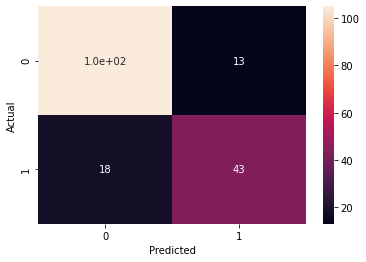

In [28]:
lr = LogisticRegression()
l = 0
for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    m = accuracy_score(y_test, y_pred)
    if l < m:
        y_test_f = y_test
        x_test_f = x_test
        x_train_f = x_train
        y_train_f = y_train
lr.fit(x_train_f,y_train_f)
y_pred_f = lr.predict(x_test_f)

print(m)
print("score:{}".format(accuracy_score(y_test_f, y_pred_f)))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [163]:
d = {'Pclass': [5, 3, 2, 1, 8, 6],'Sex': [1, 0, 1, 0, 1, 1],'Age': [50, 16, 10, 18, 17, 36],'SibSp': [0, 0, 0, 1, 1, 0],'Parch': [4, 5, 0, 1, 4, 2],'Fare': [63.5, 19, 12.3, 54, 87.5, 23.8]}

In [164]:
data = pd.DataFrame.from_dict(d)

In [165]:
who = lr.predict(data)

In [166]:
print(who)

['0' '1' '0' '1' '0' '0']
